In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv')

# Display the first few rows of the dataset
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()


Category    0
Message     0
dtype: int64


In [3]:
# Convert 'Category' to numerical labels
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Display the dataset after transformations
df.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


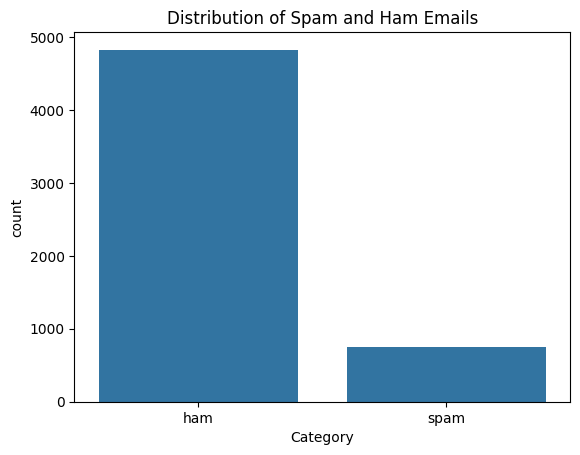

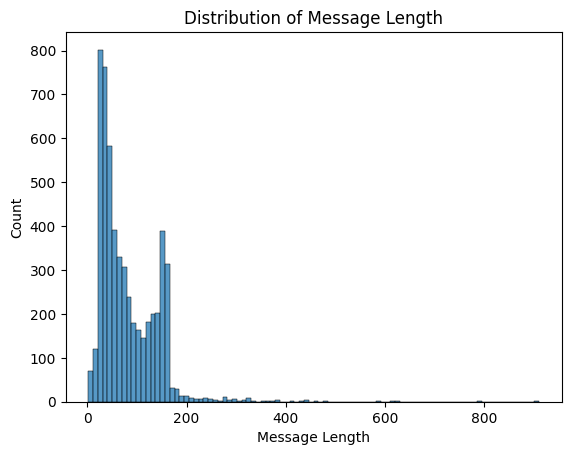

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.show()

# Analyze the length of messages
df['Message Length'] = df['Message'].apply(len)
sns.histplot(df['Message Length'])
plt.title('Distribution of Message Length')
plt.show()


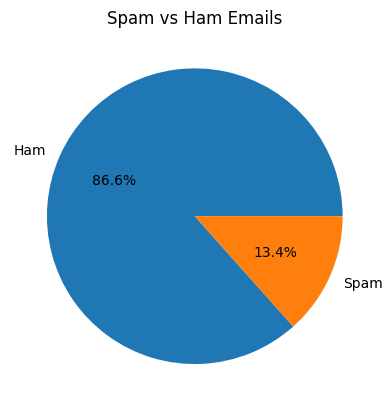

In [31]:
import matplotlib.pyplot as plt

# Counting the number of spam and ham emails
spam_count = df['Category'].value_counts()[1]
ham_count = df['Category'].value_counts()[0]

# to create a pie chart
plt.pie([ham_count, spam_count], labels=['Ham', 'Spam'], autopct='%1.1f%%')
plt.title('Spam vs Ham Emails')
plt.show()


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vectorizing the text messages
vectorizer = CountVectorizer()                      #counts how many time each word appear in text
X = vectorizer.fit_transform(df['Message'])         #convert the text messages into numbers

# Defining target variable
y = df['Category']

# breaking data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #random_state=42 tells us that the split is the same every time we run the code.


In [7]:
from sklearn.naive_bayes import MultinomialNB

# Training Naive Bayes model
model = MultinomialNB()                #s an empty container that we'll fill with about spam and ham emails
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)


Accuracy: This tells us how often the model predicted correctly overall.
Precision: This tells us how many of the messages predicted as spam are actually spam.
Recall: This tells us how many of the actual spam messages the model predicted as spam.
F1 Score: This is a combination of precision and recall. It's like an average of both.

Accuracy: 0.9748062015503876
Precision: 0.8693693693693694
Recall: 0.9507389162561576
F1 Score: 0.908235294117647


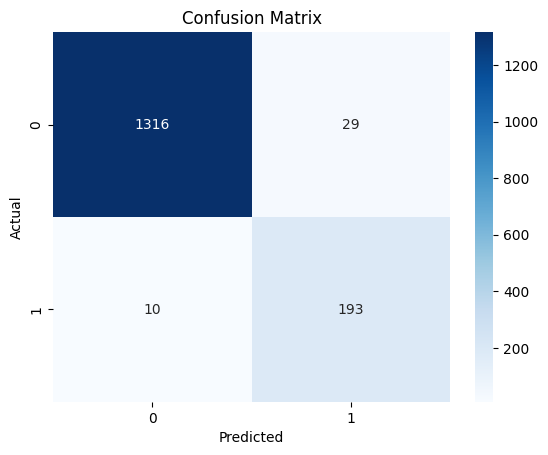

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# to show Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import joblib

# Saving the model and vectorizer
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [10]:
!pip install flask-ngrok


In [11]:
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [12]:
!pip install pyngrok


In [13]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00


In [14]:
from flask import Flask
from pyngrok import ngrok

In [15]:
!ngrok config add-authtoken 2hKZ0eGFkmn04QhPtlPH4pFDDnN_5Er286uH2q8HgQoYTs967


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [16]:
from pyngrok import ngrok

# Setting the new ngrok authtoken
ngrok.set_auth_token("2hKZ0eGFkmn04QhPtlPH4pFDDnN_5Er286uH2q8HgQoYTs967")

# Creating a ngrok tunnel
public_url = ngrok.connect(5000).public_url

print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")


 * ngrok tunnel "https://6f67-35-229-254-8.ngrok-free.app" -> "http://127.0.0.1:5000"


In [17]:
port_no = 5000

In [18]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import joblib
import requests

# Loading the model and vectorizer
model = joblib.load('spam_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return "Spam Detection Model is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    message = data['message']
    data_vectorized = vectorizer.transform([message])
    prediction = model.predict(data_vectorized)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    # Set your ngrok authtoken
    ngrok.set_auth_token("2hKZ0eGFkmn04QhPtlPH4pFDDnN_5Er286uH2q8HgQoYTs967")

    # Set up ngrok and get public URL
    port_no = 5000  # we can change the port number if needed
    public_url = ngrok.connect(port_no).public_url
    print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port_no}\"")

    # Run Flask app in a separate thread
    import threading
    threading.Thread(target=app.run).start()

    # Make a request to the ngrok tunnel URL
    ngrok_url = f"{public_url}/predict"
    test_message = {"message": "Congratulations! You've won a free ticket to the Bahamas. Call now to claim your prize."}

    # Send the POST request
    response = requests.post(ngrok_url, json=test_message)

    # Print the response
    print(response.json())


 * ngrok tunnel "https://d0c4-35-229-254-8.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Jun/2024 03:49:21] "POST /predict HTTP/1.1" 200 -


{'prediction': 1}


In [19]:
import numpy as np

# Feature analysis
feature_names = vectorizer.get_feature_names_out()                            #This gets the feature names (words) used by the vectorizer, which were turned into numbers during training.
feature_log_probs = model.feature_log_prob_[1] - model.feature_log_prob_[0]   #This gives the log probability of each feature (word) in each class (spam or ham).
important_features = np.argsort(feature_log_probs)[-20:]

print("Top 20 words indicative of spam:")
for idx in important_features:
    print(feature_names[idx])

# Summary
print(f"The model has an accuracy of {accuracy:.2f}, precision of {precision:.2f}, recall of {recall:.2f}, and F1 score of {f1:.2f}.")
print("The top indicative words of spam include terms like 'free', 'winner', 'call', etc.")


Top 20 words indicative of spam:
camera
8007
valid
150ppm
nokia
ringtone
uk
1000
awarded
cs
500
guaranteed
co
www
18
service
tone
150p
prize
claim
The model has an accuracy of 0.97, precision of 0.87, recall of 0.95, and F1 score of 0.91.
The top indicative words of spam include terms like 'free', 'winner', 'call', etc.


In [20]:
import os

# To list files in the curr directory
print(os.listdir('.'))


['.config', 'spam_model.pkl', 'spam.csv', 'vectorizer.pkl', 'sample_data']


In [21]:
html_content = '''
<!DOCTYPE html>
<html>
<head>
    <title>Phishing Email Detection</title>
    <style>
        body {
            background-color: #121212;
            color: #ffffff;
            font-family: Arial, sans-serif;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: flex-start;
            min-height: 100vh;
            margin: 0;
            padding: 20px;
        }
        h1 {
            color: #4caf50;
        }
        form {
            background-color: #1e1e1e;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0px 0px 10px 0px #000000;
            margin-bottom: 20px;
            width: 100%;
            max-width: 600px;
            box-sizing: border-box;
        }
        label, textarea {
            display: block;
            width: 100%;
            margin: 10px 0;
        }
        textarea {
            background-color: #2e2e2e;
            color: #ffffff;
            border: 1px solid #4caf50;
            border-radius: 4px;
            padding: 8px;
            resize: none;
        }
        input[type="button"] {
            background-color: #4caf50;
            color: white;
            border: none;
            border-radius: 5px;
            padding: 10px 20px;
            cursor: pointer;
            transition: background-color 0.3s;
        }
        input[type="button"]:hover {
            background-color: #45a049;
        }
        #result {
            margin-top: 20px;
            font-size: 1.2em;
        }
        #graph-buttons {
            margin-top: 20px;
            display: flex;
            justify-content: space-around;
            width: 100%;
            max-width: 600px;
        }
        #graph-container {
            margin-top: 20px;
            width: 100%;
            max-width: 600px;
        }
        #pie-chart, #bar-chart {
            display: none;
        }
        canvas {
            background-color: #1e1e1e;
            border-radius: 10px;
            box-shadow: 0px 0px 10px 0px #000000;
            padding: 20px;
        }
    </style>
</head>
<body>
    <h1>Phishing Email Detection Model</h1>
    <form id="emailForm">
        <label for="email">SPAM DETECTOR:</label>
        <textarea id="email" name="email" rows="4" cols="50"></textarea>
        <input type="button" value="Check" onclick="checkSpam()">
    </form>
    <p id="result"></p>

    <div id="graph-buttons">
        <input type="button" value="Show Pie Chart" onclick="showPieChart()">
        <input type="button" value="Show Bar Chart" onclick="showBarChart()">
    </div>

    <div id="graph-container">
        <div id="pie-chart">
            <canvas id="pieChartCanvas"></canvas>
        </div>
        <div id="bar-chart">
            <canvas id="barChartCanvas"></canvas>
        </div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script>
        function checkSpam() {
            const email = document.getElementById("email").value;
            fetch("/predict", {
                method: "POST",
                headers: {
                    "Content-Type": "application/json"
                },
                body: JSON.stringify({ message: email })
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById("result").innerText = data.prediction === 1 ? "Spam" : "Ham";
            })
            .catch(error => console.error("Error:", error));
        }

        let pieChart;  // Global variable to hold the pie chart instance
        let barChart;  // Global variable to hold the bar chart instance

        function showPieChart() {
            document.getElementById('pie-chart').style.display = 'block';
            document.getElementById('bar-chart').style.display = 'none';
            const ctx = document.getElementById('pieChartCanvas').getContext('2d');
            if (pieChart) {
                pieChart.destroy();  // Destroy previous instance to avoid overlapping
            }
            pieChart = new Chart(ctx, {
                type: 'pie',
                data: {
                    labels: ['Ham', 'Spam'],
                    datasets: [{
                        data: [87.6, 12.4],  // Example data, replace with real data
                        backgroundColor: ['#4caf50', '#f44336']
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'top',
                        }
                    }
                }
            });
        }

        function showBarChart() {
            document.getElementById('pie-chart').style.display = 'none';
            document.getElementById('bar-chart').style.display = 'block';
            const ctx = document.getElementById('barChartCanvas').getContext('2d');
            if (barChart) {
                barChart.destroy();  // Destroy previous instance to avoid overlapping
            }
            barChart = new Chart(ctx, {
                type: 'bar',
                data: {
                    labels: ['Ham', 'Spam'],
                    datasets: [{
                        label: '# of Emails',
                        data: [87.6, 12.4],  // Example data, replace with real data
                        backgroundColor: ['#4caf50', '#f44336']
                    }]
                },
                options: {
                    responsive: true,
                    plugins: {
                        legend: {
                            position: 'top',
                        }
                    },
                    scales: {
                        y: {
                            beginAtZero: true
                        }
                    }
                }
            });
        }
    </script>
</body>
</html>


'''


with open('index.html', 'w') as file:
    file.write(html_content)


In [22]:
from flask import Flask, request, jsonify, send_file
from pyngrok import ngrok
import joblib
import threading

# Load the model and vectorizer
model = joblib.load('spam_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    return send_file('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    message = data['message']
    data_vectorized = vectorizer.transform([message])
    prediction = model.predict(data_vectorized)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    # Set your ngrok authtoken
    ngrok.set_auth_token("2hKZ0eGFkmn04QhPtlPH4pFDDnN_5Er286uH2q8HgQoYTs967")

    # Set up ngrok and get public URL
    port_no = 5001  # Changed port number to 5000
    public_url = ngrok.connect(port_no).public_url
    print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port_no}\"")

    # Run Flask app in a separate thread
    threading.Thread(target=lambda: app.run(port=port_no, debug=True, use_reloader=False)).start()


 * ngrok tunnel "https://7397-35-229-254-8.ngrok-free.app" -> "http://127.0.0.1:5001"
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit


In [23]:
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory
